# Modules, Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [26]:
# changing the max_columns value
pd.set_option("display.max_columns", None)

# set seaborn theme
sns.set_theme()

# Functions

# Dataset
**Auto-mpg dataset** - Mileage per gallon performances of various cars.

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. This dataset and the original dataset is available in Kaggle https://www.kaggle.com/datasets/uciml/autompg-dataset

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [17]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Web searches to find some missing data;

| Model          | horsepower |
|:--------------:|:----------:|
| ford pinto 71' | 75         |
| ford maverick 74' | 82      |
| renault lecar deluxe 80' | 50  |
| ford mustang cobra 80' | 88 |
| renault 18i 81' | 82 |
| amc concord dl 82' | 82 |

Add the hoesepower to the table

In [6]:
df.loc[32,'horsepower'] = 75
df.loc[126,'horsepower'] = 82
df.loc[330,'horsepower'] = 50
df.loc[336,'horsepower'] = 88
df.loc[354,'horsepower'] = 82
df.loc[374,'horsepower'] = 82

In [7]:
df.describe().style.format(precision=3)  

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,2970.425,15.568,76.010,1.573
std,7.816,1.701,104.270,846.842,2.758,3.698,0.802
min,9.000,3.000,68.000,1613.000,8.000,70.000,1.000
25%,17.500,4.000,104.250,2223.750,13.825,73.000,1.000
50%,23.000,4.000,148.500,2803.500,15.500,76.000,1.000
75%,29.000,8.000,262.000,3608.000,17.175,79.000,2.000
max,46.600,8.000,455.000,5140.000,24.800,82.000,3.000


<AxesSubplot:>

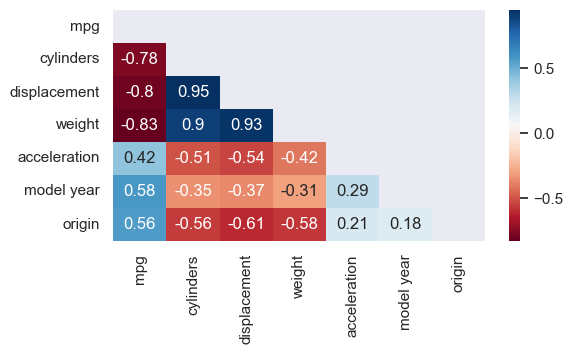

In [27]:
#correlation
plt.figure(figsize=(6,3))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),annot=True, mask=mask, cmap='RdBu')

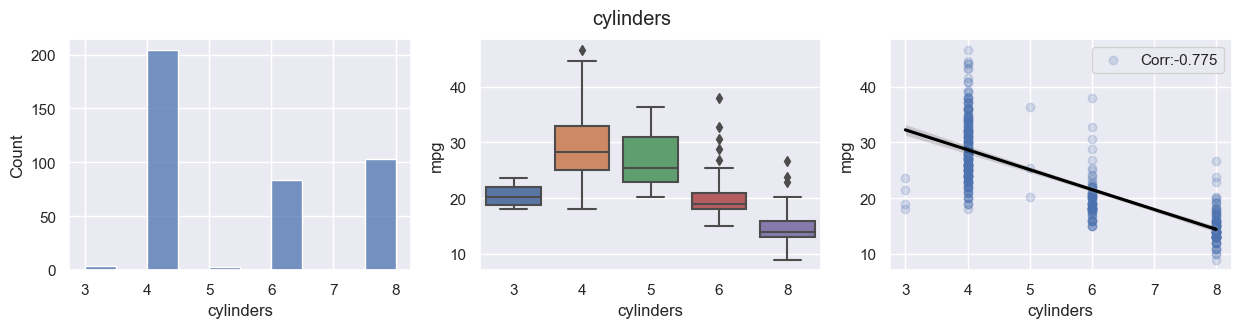

In [58]:
   
fig = plt.figure(figsize=(15,3))
fig.suptitle('cylinders')
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


# ax1: hist plot
sns.histplot(data=df, x='cylinders',  ax=ax1)

# ax2: box plot
sns.boxplot(data=df, y='mpg', x='cylinders', ax=ax2)
    
# ax3: scatter plot  
# sb.scatterplot(data=df, y='price', x=feature, ax=ax3)
cor = round(df['mpg'].corr(df['cylinders']),3)
sns.regplot(data=df, y='mpg', x='cylinders', line_kws={'color':'black'},label='Corr:'+str(cor), scatter_kws={'alpha':0.2}, ax=ax3)
ax3.legend()
    
    
plt.show(fig)